# Reviewer for Finals in DMW

This reviewer is meant to supplement the Reader’s existing reviewers and notes. The author of this notebook shall not assume any responsibility on the accuracy and completeness of any information provided in this reviewer. The Reader is
expected to exercise prudence in reading through the reviewer and is free to comment on its accuracy and
completeness for everyone's benefit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.testing import (assert_equal, assert_almost_equal, 
                           assert_array_equal, assert_array_almost_equal)

In this reviewer, we will use the `Heart Disease UCI Dataset`. A detailed description of dataset can be accessed [here](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7). This dataset is available in [kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

Information about the Heart Disease UCI Dataset
----

- `age`: The person’s age in years

- `sex`: The person’s sex (1 = male, 0 = female)

- `cp`: chest pain type
   - Value 0: asymptomatic
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: typical angina
    
- `trestbps`: The person’s resting blood pressure (mm Hg on admission to the hospital)

- `chol`: The person’s cholesterol measurement in mg/dl

- `fbs`: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

- `restecg`: resting electrocardiographic results
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    - Value 1: normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- `thalach`: The person’s maximum heart rate achieved

- `exang`: Exercise induced angina (1 = yes; 0 = no)

- `oldpeak`: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

- `slope`: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
    - 0: downsloping
    - 1: flat
    - 2: upsloping

- `ca`: The number of major vessels (0–3)

- `thal`: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    - 1: fixed defect (no blood flow in some part of the heart)
    - 2: normal blood flow
    - 3: reversible defect (a blood flow is observed but it is not normal)

- `target`: Heart disease (1 = no, 0= yes)

In [46]:
# read UCI Heart Disease Data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# check shape of data
df.shape

(303, 14)

In [48]:
# check data types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Preliminaries

The following are some preliminaries that need to be done in order to perform further analysis to a given dataset:
- Find **target feature**.
- Identify **numeric**, **categorical**, and **bag-of-words** feature.
- Perform `one-hot` encoding if **categorical** variables are present.
- Perform `TF-IDF` vectorization if **bag-of-words** feature/s are present.
- Concatenate features - we do this after we get the numeric, categorical, BoW

Identify Numeric, Categoric, *Bag-of-Words* Columns/Features
---

|Column/Attribute Name| Data Type | Description |
| :--- | :--- | :---- |
| age | int | numeric |
| sex | int |categoric|
| cp |int | categoric |
| trestbps |int | numeric |
| chol | int| numeric |
| fbs | int | categoric |
| restecg | int| categoric |
| thalach | int| numeric |
| exang | int| categoric |
| oldpeak | float | numeric |
| slope | int| categoric |
| ca | int| numeric |
| thal | int| categoric |
| target | int| categoric |

In [49]:
# we need to perform OHE for those that are categorical figures 

In [50]:
# get target feature
df_target = df['target']
df_target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [51]:
# get numeric columns
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df_num = df[col_num]
df_num

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


In [52]:
# get categoric columns with three or more variables
# we just perform OHE on those categories which has more than 2 
col_cat_3 = ['cp', 'restecg', 'slope', 'thal']
df_cat_3 = df[col_cat_3]
df_cat_3
df_cat_3.info()

# the data types are still integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cp       303 non-null    int64
 1   restecg  303 non-null    int64
 2   slope    303 non-null    int64
 3   thal     303 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


In [53]:
df_cat_3.head()

,cp,restecg,slope,thal
0,3,0,0,1
1,2,1,0,2
2,1,0,2,2
3,1,1,2,2
4,0,1,2,2


In [54]:
df_trial = pd.get_dummies(df_cat_3)
df_trial.head()

# same lang as before kasi binasa siya as integer
# hence, we need to astype the categorical

,cp,restecg,slope,thal
0,3,0,0,1
1,2,1,0,2
2,1,0,2,2
3,1,1,2,2
4,0,1,2,2


In [55]:
# this is what we are going to OHE
# I need to perform the numeric into categorical variable

# since integer, make these values categorical
for col in col_cat_3:
    df_cat_3[col] = df_cat_3[col].astype('category')
df_cat_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cp       303 non-null    category
 1   restecg  303 non-null    category
 2   slope    303 non-null    category
 3   thal     303 non-null    category
dtypes: category(4)
memory usage: 2.0 KB


<ipython-input-55-3f8390306613>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_3[col] = df_cat_3[col].astype('category')


In [56]:
# perform one-hot encoding on categoric columns with three or more variables
df_cat_3_one_hot = pd.get_dummies(df_cat_3)
df_cat_3_one_hot.head()

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [57]:
# get categoric columns with 2 variables only
col_cat_2 = ['sex', 'fbs', 'exang']
df_cat_2 = df[col_cat_2]
df_cat_2.head()

,sex,fbs,exang
0,1,1,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,1


In [58]:
# concatenate dataframe
df_final = pd.concat([df_num, df_cat_2, df_cat_3_one_hot, df_target], axis=1)
df_final.head()

# we added the df target first because IR muna
# we should remove this pag nasa SVD na tayo

,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,cp_0,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,56,120,236,178,0.8,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1


In [59]:
df_final.info()

# we have 24 columns
# without the target, we have 23 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   ca         303 non-null    int64  
 6   sex        303 non-null    int64  
 7   fbs        303 non-null    int64  
 8   exang      303 non-null    int64  
 9   cp_0       303 non-null    uint8  
 10  cp_1       303 non-null    uint8  
 11  cp_2       303 non-null    uint8  
 12  cp_3       303 non-null    uint8  
 13  restecg_0  303 non-null    uint8  
 14  restecg_1  303 non-null    uint8  
 15  restecg_2  303 non-null    uint8  
 16  slope_0    303 non-null    uint8  
 17  slope_1    303 non-null    uint8  
 18  slope_2    303 non-null    uint8  
 19  thal_0     303 non-null    uint8  
 20  thal_1    

# Information Retrieval

## Practice Problem 1

Create a function `closest_euc_p1` that accepts `df_final` and returns the 10 patient `id`s (this is the index) by increasing Euclidean distance from patient `id` `200`, precision and recall. A result is considered relevant if it comes from the same `target` as the query.

In [60]:
# This is an IR problem -- included yung target feature!
query = df_final.loc[200].to_numpy()
# query.shape
query

# this is the features of patient 200
# we do this so that we know who is patient 200?

array([ 44., 110., 197., 177.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
         0.,   0.])

In [61]:
# included yung target feature!

In [62]:
# FOR COSINE
# if cosine distance = 0 --> similar
# if consie similarity = 0 --> dissimilar (opposite of cosine distance)

In [63]:
from scipy.spatial.distance import euclidean, cityblock, cosine
# the cosine above is cosine distance

def nearest_k(query, objects, k, dist):
    """Return the indices to objects most similar to query"""
    return np.argsort([dist(query, obj) for obj in objects])[:k]

def closest_euc_p1(df_final):
    # get query
    query = df_final.loc[200].to_numpy() # this is the patient id
    
    # get actual
    actual = query[23] # the patient does not have a heart disease - TARGET
    
    # get objects
    objects = df_final.to_numpy() # search the whole dataset
    
    # get all labels - to compare si patient 200 with all of these
    all_labels = (df_final.to_numpy())[:, 23] # this is the target label
    all_labels = np.array(all_labels)
    
    # get res - this is the function from above
    res = nearest_k(query, objects, 10, euclidean)
    
    # we now compare the precision and recall
    
    # get relevant res
    rel = 0
    for i in res:
        if all_labels[i] == actual:
            rel += 1
        else:
            rel += 0
    
    # get irrelevant res
    irr = 0
    for i in range(len(all_labels)):
        if (all_labels[i] != actual) and (i not in res):
            irr += 1
        else:
            irr += 0
    
    # get tp, fp, fn, tn
    tp = rel
    fp = len(res) - tp
    fn = len(all_labels) - len(res) - irr
    tn = irr
    
    # calculate for precision and recall
    prec = tp/(tp + fp)
    rec = tp/(tp + fn)
    return res, prec, rec

In [64]:
res, prec, rec = closest_euc_p1(df_final)
res, prec, rec

# the array contains the indices of the most similar results
## descending -- is the most similar to 200

# we have low prec, rec
# could it be that the they are not normalized/standardized?

(array([200, 118,  30, 157, 142, 124,  58,  62, 113,   2]),
 0.1,
 0.00641025641025641)

In [65]:
df_final.loc[res]

# isa lang ang tama nya, kaya 0.1 lang yung precision

,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,cp_0,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target
200,44,110,197,177,0.0,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
118,46,105,204,172,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
30,41,105,198,168,0.0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
157,35,122,192,174,0.0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
142,42,120,209,173,0.0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
124,39,94,199,179,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
58,34,118,182,174,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
62,52,118,186,190,0.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
113,43,110,211,161,0.0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,1
2,41,130,204,172,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [66]:
# we need to normalize
# standardize scaler --> it is good for data that has outliers - pero di siya okay for NMF (because we cannot have neg values)
# min-max --> works best for bounded values [if we know the bounds of the features], may be used for NMF
## but know that there are drawbacks 

## Practice Problem 2

Create a function `compute_auc_euc_p2` that accepts `df_final` and returns the AUC distance when the patient `id` `200` is the query and Euclidean distance is the metric. A result is considered relevant if it comes from the same `target` as the query.

In [67]:
# AUC -- area under the curve of the PR curve
# The ideal value of AUC is 1

In [72]:
def get_confusion(actual, results, all_labels):
    index_labels = set(range(len(all_labels)))
    index_results = set(results)
    index_non = list(index_labels - index_results)
    label_non = []
    for i in index_non:
        label_non.append(all_labels[i])
    label_res = []
    for i in results:
        label_res.append(all_labels[i])
    TP = 0
    for i in label_res:
        if i == actual:
            TP += 1
    FP = len(label_res) - TP
    FN = 0
    for i in label_non:
        if i == actual:
            FN += 1
    TN = len(label_non) - FN
    matrix = pd.DataFrame({'relevant': [TP, FN], 'irrelevant':[FP, TN]})
    matrix.index = ['relevant', 'irrelevant']
    return matrix

def precision(confusion):
    r = confusion.iloc[0, 0]
    k = r + confusion.iloc[0, 1]
    p = r/k
    return p

def recall(confusion):
    r = confusion.iloc[0, 0]
    n = r + confusion.iloc[1, 0]
    rec = r/n
    return rec

def auc_pr(query, objects, dist, actual, all_labels):
    """Return the area under the PR curve"""
    init_rec, init_prec = [0], [1]
    k_res = nearest_k(query, objects, len(objects), dist)
    
    for k in range(1, len(objects) + 1):
        results = k_res[:k]
        confusion = get_confusion(actual, results, all_labels)
        init_rec.append(recall(confusion))
        init_prec.append(precision(confusion))
        
    area_curve = np.trapz(init_prec, init_rec)
    return area_curve

In [73]:
def compute_auc_euc_p2(df_final):
    # get query
    query = df_final.loc[200].to_numpy()
    
    # get actual
    actual = query[23]
    
    # get objects
    objects = df_final.to_numpy()
    
    # get all labels
    all_labels = (df_final.to_numpy())[:, 23]
    all_labels = np.array(all_labels)
    
    # get the area under the curve using auc_pr
    auc = auc_pr(query, objects, euclidean, actual, all_labels)
    return auc

In [75]:
compute_auc_euc_p2(df_final)

# this is not good looking -- should be 60%
# since we did not scale 

# the ideal is 1

0.3571243542385059

## Practice Problem 2 (Aside)

Plot the PR-curve of the results given above. What can you say about the resulting graph?

In [77]:
def pr_curve(query, objects, dist, actual, all_labels):
    init_rec, init_prec = [0], [1]
    k_res = nearest_k(query, objects, len(objects), dist)
    
    for k in range(1, len(objects) + 1):
        results = k_res[:k]
        confusion = get_confusion(actual, results, all_labels)
        init_rec.append(recall(confusion))
        init_prec.append(precision(confusion))

    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_aspect('equal')
    ax.step(init_rec, init_prec, where='post')
    ax.fill_between(init_rec, init_prec, step='post')
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    plt.show()
    return ax

In [78]:
# get query
query = df_final.loc[200].to_numpy()

# get actual
actual = query[23]

# get objects
objects = df_final.to_numpy()

# get all labels
all_labels = (df_final.to_numpy())[:, 23]
all_labels = np.array(all_labels)

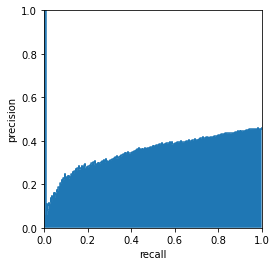

In [80]:
pr_curve(query, objects, euclidean, actual, all_labels);

# the ideal is that the area is 100% filled

# Dimensionality Reduction and Clustering

Note that when performing dimensionality reduction and clustering, the `target` feature is removed from the dataset.

In [81]:
# the target feature should be removed from the dataset -- similar to the exercises
# the ground truth is the 'target' -- but this is not always given

## Practice Problem 3

Perform dimensionality reduction on `df_final` using one of the methods discussed in class. Justify your choice of dimensionality reduction method.

Your answer here

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
# Drop the target
df_final = df_final.drop('target', axis=1)

# Scale the dataset - where the target was already dropped
mms = MinMaxScaler()
df_final_scaled = mms.fit_transform(df_final)

In [86]:
# Place function on truncated_svd
def truncated_svd(X):
    """Return the truncated svd
    
    PARAMETERS
    ----------
    X: array where columns are features and rows are observations
    
    RETURNS
    -------
    q, s, p, nssd: array
    nssd: normalized sum of squared distance from the origin
    """
    
    q, s, p = np.linalg.svd(X)
    sigma = np.diag(s)
    nssd = s**2/sum(s**2)
    return q, sigma, p.T, nssd

In [95]:
# Perform SVD
q, sigma, p, nssd = truncated_svd(df_final_scaled)

# nssd --> variance explained (not sigma)

In [110]:
# Check how many SVs needed for certain variance explained
# these are already in percentage!
s = nssd
s.cumsum()/s.sum()

array([0.52236379, 0.64963779, 0.72734163, 0.78458732, 0.83234776,
       0.86482945, 0.8894277 , 0.91121117, 0.9319245 , 0.94731904,
       0.96088474, 0.97195335, 0.9813351 , 0.98647712, 0.989928  ,
       0.99287387, 0.99544974, 0.99726332, 0.99879546, 1.        ,
       1.        , 1.        , 1.        ])

In [111]:
# Check the final shape
df_final_scaled.shape

(303, 23)

In [112]:
num_vec = 8

# if we multiply q, nssd-diag, and p --> we get the same shape as the original matrix
((q[:, :num_vec] @ np.diag(s[:num_vec])) @ p[:num_vec]).shape

# SVD helps us truncate the data

(303, 23)

In [113]:
# Plot SVD
def plot_svd(X_new, features, p):
    """
    Plot transformed data and features on to the first two singular vectors

    Parameters
    ----------
    X_new : array
        Transformed data
    featurs : sequence of str
        Feature names
    p : array
        P matrix
    """
    fig, ax = plt.subplots(1, 2, subplot_kw=dict(aspect='equal'),
                           gridspec_kw=dict(wspace=0.4), dpi=150)
    ax[0].scatter(X_new[:, 0], X_new[:, 1])
    ax[0].set_xlabel('SV1')
    ax[0].set_ylabel('SV2')

    for feature, vec in zip(features, p):
        ax[1].arrow(0, 0, vec[0], vec[1], width=0.01, ec='none', fc='r')
        ax[1].text(vec[0], vec[1], feature, ha='center', color='r', fontsize=5)
    ax[1].set_xlim(-1, 1)
    ax[1].set_ylim(-1, 1)
    ax[1].set_xlabel('SV1')
    ax[1].set_ylabel('SV2')

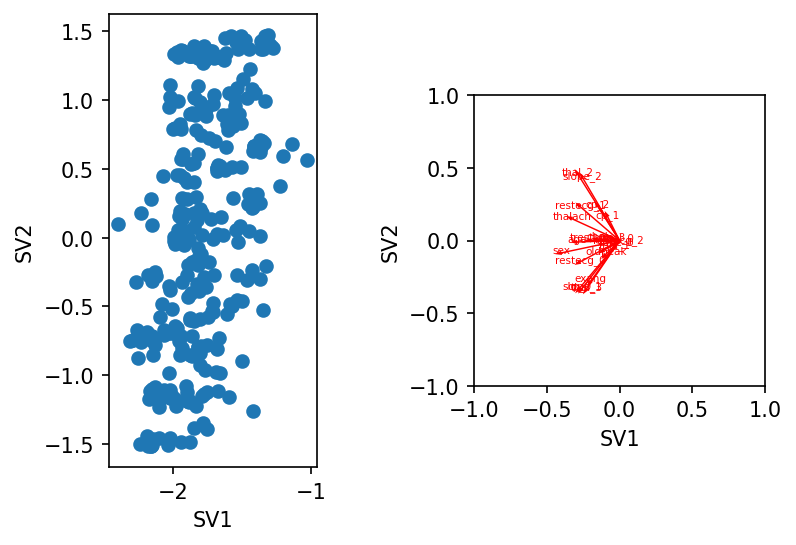

In [115]:
# Set variables
X_scaled = df_final_scaled
X_new_svd = X_scaled.dot(p[:, :2]) # from Manual SVD in the Codes Reviewer - 2 singular vectors for plotting purposes
features = df_final.columns # the original df, not the scaled one
p=p

plot_svd(X_new_svd, features, p)

## Practice Problem 4

Interpret the results of the dimensionality reduction.

**Interpretation GUIDE**

* **Coordinates**: What do the directions of each PC mean? Use the general direction of the transformed dimensions as a guide.
* **Correlations**: Which groups of transformed dimensions point toward the same direction? Which are opposite to each other? These suggest correlation or anticorrelation.
* **Clusters**: Which points clump together?
* **Funnels**: Are there points that are wide on one side and narrow on the other? This suggest dependence of principal components.
* **Voids**: Are there unusually unpopulated areas? This suggests certain combinations of values are unlikely to occur.

## Practice Problem 5

Cluster `df_final` (with reduced dimensions), i.e., assign a cluster label to each patient, using an representative based clustering method. What is the best value for the number of clusters? Justify your choice of method and your best number of clusters.

Your answer here

<AxesSubplot:>

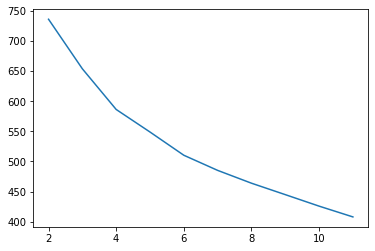

In [119]:
# We could use inertia to get the elbow - this is to justify the value for the number of clusters

from sklearn.cluster import KMeans
sse = pd.Series(index=range(2, 12), dtype='float64')

for k in range(2, 12):
    km = KMeans(k)
    km.fit_predict(df_final_scaled)
    inertia = km.inertia_
    sse[k] = inertia

sse.plot()
# by looking at the plot, elbow is at k=4

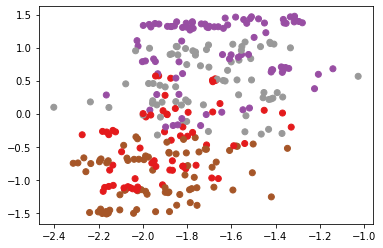

In [124]:
# Plot it using KMeans where cluster=4
km4 = KMeans(4)
y_pred = km4.fit_predict(df_final_scaled) # we predict the scaled dataset
plt.scatter(X_new_svd[:,0], X_new_svd[:,1], c=y_pred, cmap="Set1");

## Practice Problem 6

Cluster `df_final` (with reduced dimensions), i.e., assign a cluster label to each patient, using an agglomerative clustering method. What is the best value for the number of clusters? Justify your choice of method and your best number of clusters.

Your answer here

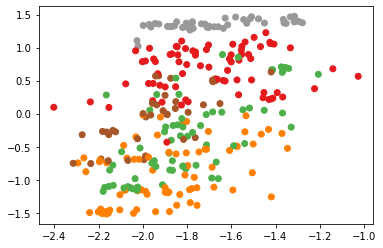

In [127]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(5)
y_agc = agc.fit_predict(df_final_scaled)
plt.scatter(X_new_svd[:,0], X_new_svd[:,1], c=y_agc, cmap="Set1");

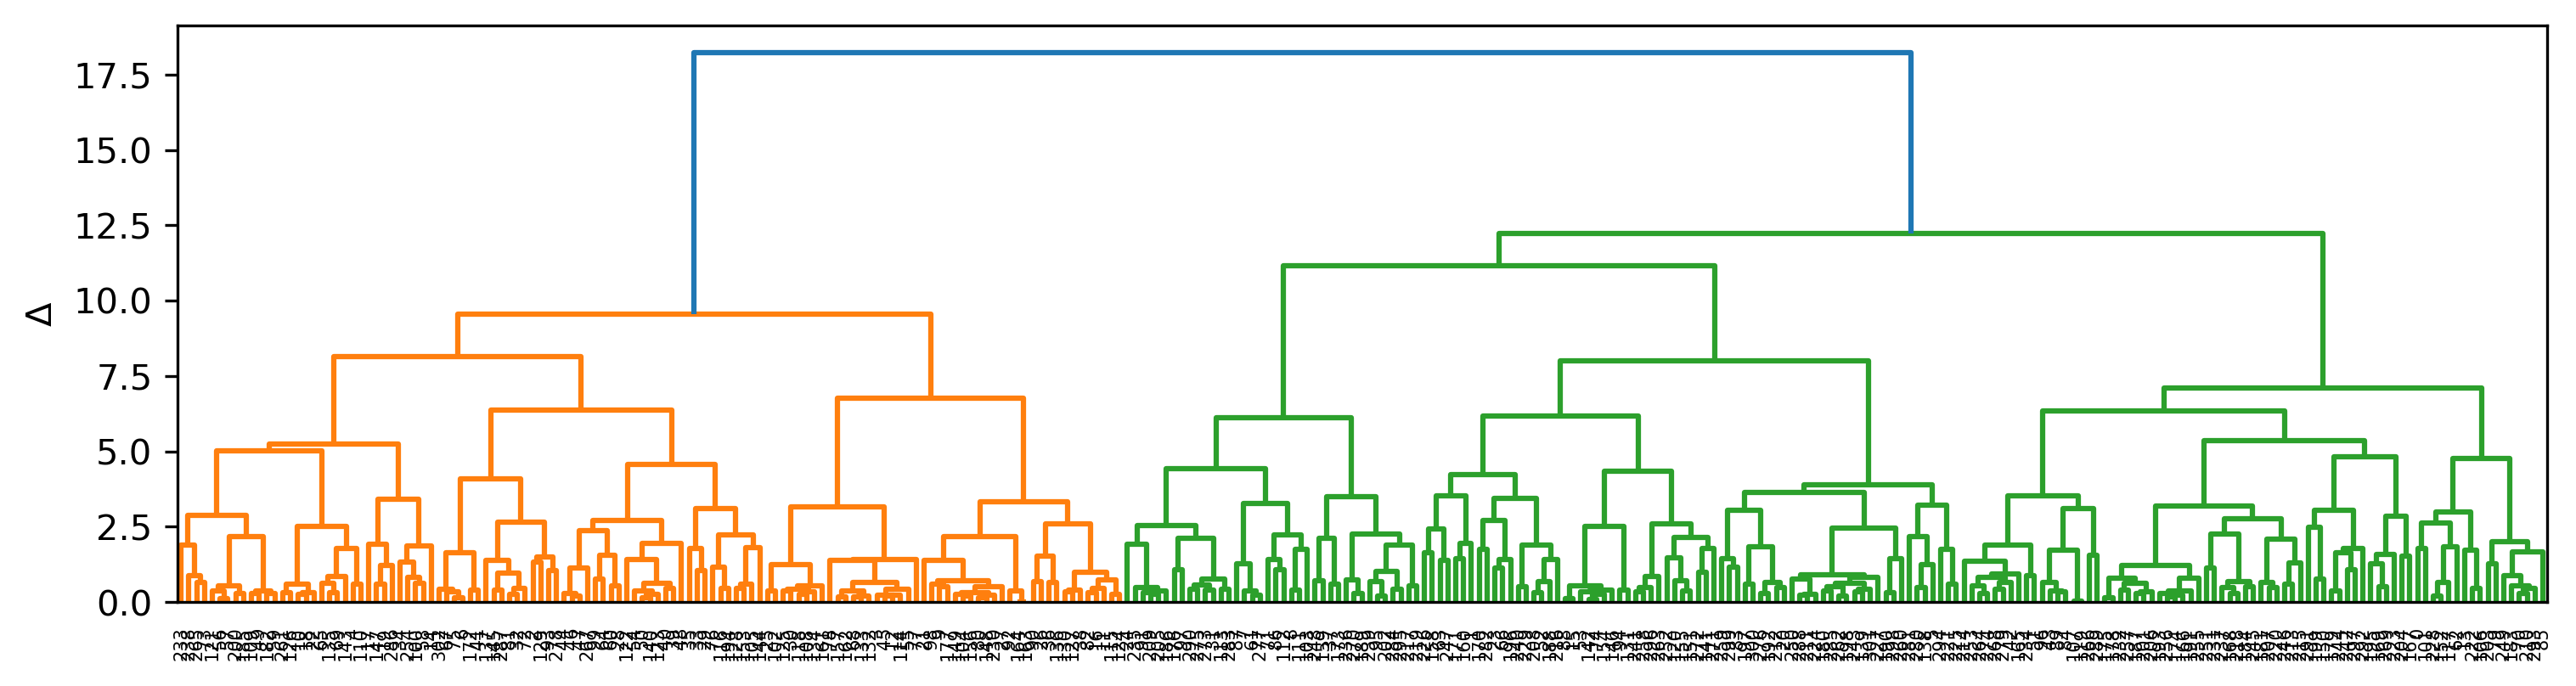

In [129]:
# Plot dendogram

# Import packages
from scipy.cluster.hierarchy import linkage, dendrogram

# Form linkage matrix
method = 'ward'
Z = linkage(df_final_scaled, method=method, optimal_ordering=True)

# Set up subplot
fig, ax = plt.subplots(figsize=(12,3), dpi=300)

# Set the plot as dendigram
dn = dendrogram(Z, ax=ax)

# Set y label as 'Delta'
ax.set_ylabel(r'$\Delta$');

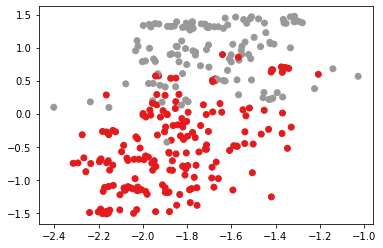

In [130]:
# seems like we only have 2 clusters. Let's run the agglomerative method once again

agc = AgglomerativeClustering(2)
y_agc = agc.fit_predict(df_final_scaled)
plt.scatter(X_new_svd[:,0], X_new_svd[:,1], c=y_agc, cmap="Set1");